# Importing Necessary Libraries

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")


!pip install ultralytics
# Clean up the notebook
clean_notebook()



Notebook cleaned.


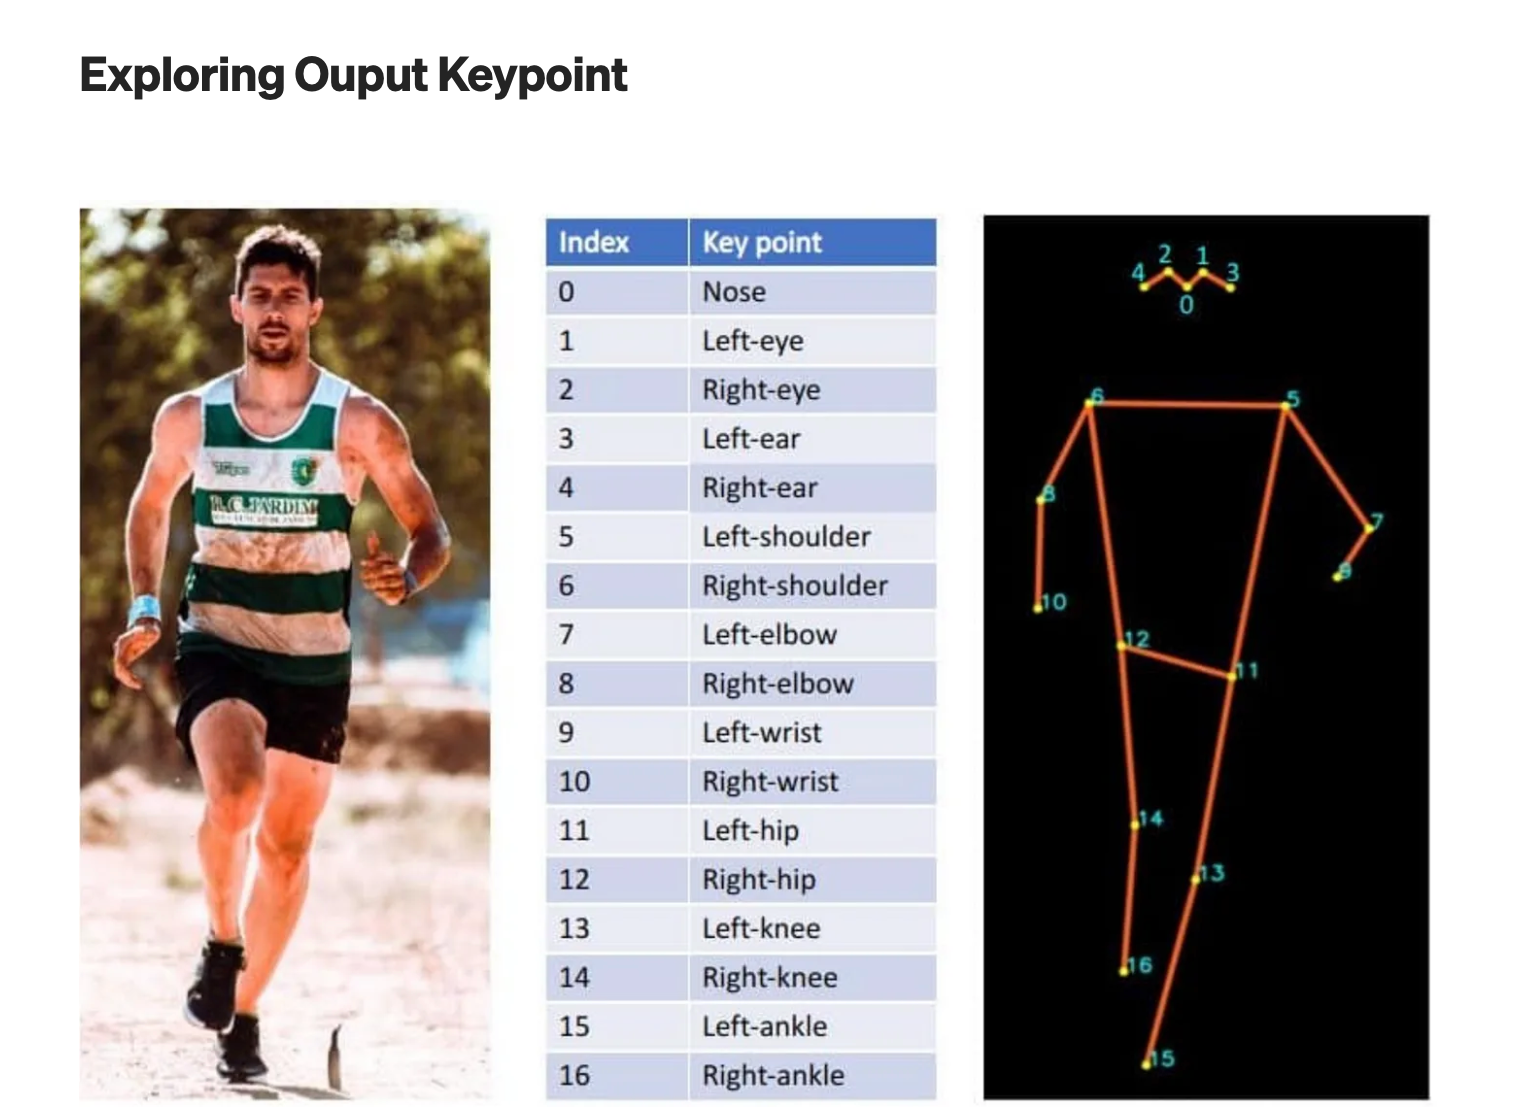
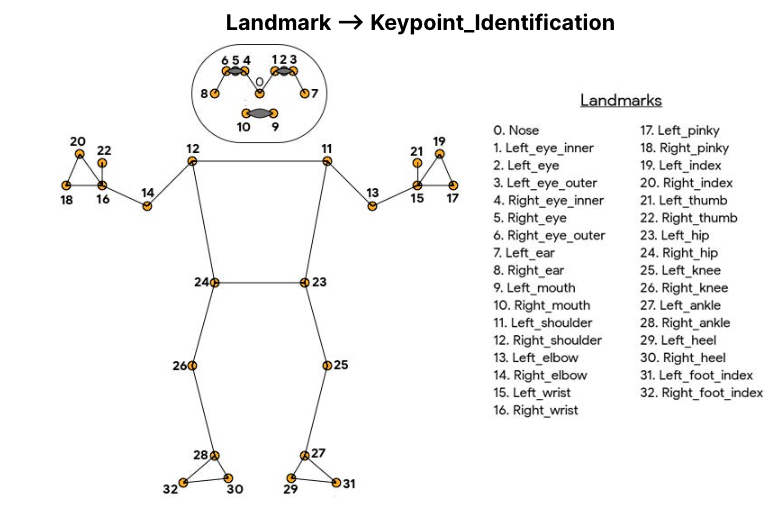


image 1/1 /workspace/code/week06/../images/Karate00.jpg: 224x320 1 person, 167.3ms
Speed: 1.1ms preprocess, 167.3ms inference, 2.8ms postprocess per image at shape (1, 3, 224, 320)


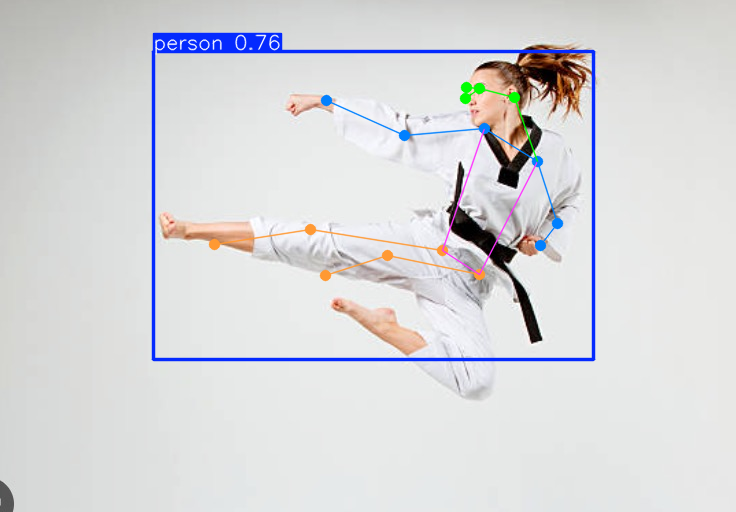

In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-pose.pt")

image_path = ".././images/Karate00.jpg"


# Perform object detection on an image
results = model(image_path, imgsz= 320)
results[0].show()

In [10]:
results[0].keypoints.data.cpu().numpy().shape

(1, 17, 3)

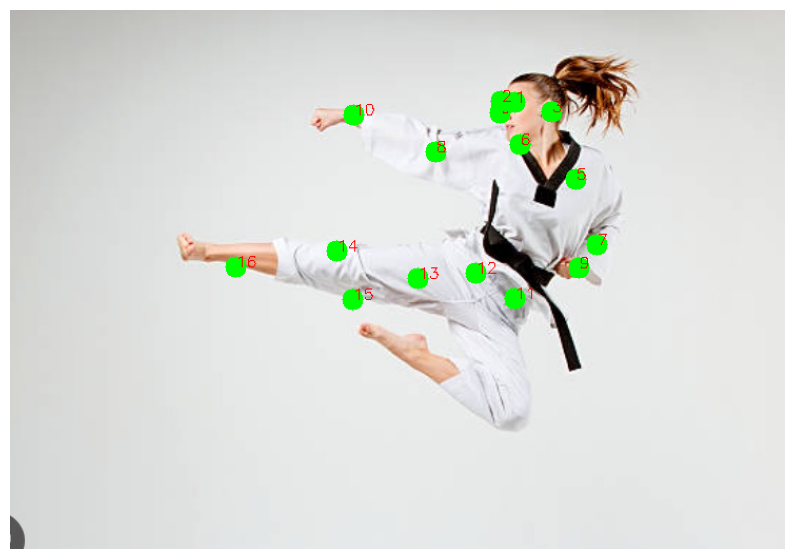

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Iterate over detected persons
for person in results[0].keypoints.data.cpu().numpy():
   
    for idx, keypoint in enumerate(person):
        x, y, confidence = keypoint
        if confidence > 0.5:  # Draw only if confidence is above a threshold
            cv2.circle(image_rgb, (int(x), int(y)), radius=10, color=(0, 255, 0), thickness=-1)
            cv2.putText(image_rgb, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()